Loading Required Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tqdm.keras import TqdmCallback

Data Generators and Data Augmentation for Plant Disease Classification

In [3]:
# Define paths for training, validation, and test data
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = '/kaggle/input/new-plant-diseases-dataset/test'
#/kaggle/working/
# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 128
EPOCHS = 7  # Training limited to 7 epochs
CLASS_MODE = 'categorical'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalization
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalization
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalization

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resizing
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resizing
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


Defining the CNN Model Architecture and Training

In [8]:
# Define CNN model
model =  models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout after pooling to reduce overfitting

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout before fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Print model summary
model.summary()
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
#7 epochs
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=7,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_model.keras', save_best_only=True)]
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,415,590 (169.43 MB)

 Trainable params: 44,415,590 (169.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 867s 2s/step - accuracy: 0.2990 - loss: 2.6015 - val_accuracy: 0.5966 - val_loss: 1.4687
Epoch 2/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6406 - loss: 0.9647 - val_accuracy: 0.5278 - val_loss: 1.2936
Epoch 3/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 852s 2s/step - accuracy: 0.7262 - loss: 0.8802 - val_accuracy: 0.7184 - val_loss: 0.9494
Epoch 4/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8438 - loss: 0.4428 - val_accuracy: 0.7500 - val_loss: 0.7495
Epoch 5/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 901s 2s/step - accuracy: 0.8162 - loss: 0.5706 - val_accuracy: 0.8160 - val_loss: 0.5957
Epoch 6/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.8047 - loss: 0.4446 - val_accuracy: 0.7222 - val_loss: 1.1811
Epoch 7/7
549/549 ━━━━━━━━━━━━━━━━━━━━ 835s 2s/step - accuracy: 0.8614 - loss: 0.4287 - val_accuracy: 0.8101 - val_loss: 0.6605


In [16]:
#7+5 additional epochs
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 128
EPOCHS = 5  # Additional 5 epochs
CLASS_MODE = 'categorical'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalization
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalization

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

# Load the previously saved model
model = load_model('/kaggle/working/best_model.keras')

# Continue training the model for 5 more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Additional 5 epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_trained_model.keras', save_best_only=True)]
)

# Save the model after the additional training
model.save('/kaggle/working/best_trained_model.keras')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/5
549/549 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.8598 - loss: 0.4314 - val_accuracy: 0.8443 - val_loss: 0.5132
Epoch 2/5
549/549 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8516 - loss: 0.4448 - val_accuracy: 0.8889 - val_loss: 0.4432
Epoch 3/5
549/549 ━━━━━━━━━━━━━━━━━━━━ 837s 2s/step - accuracy: 0.8862 - loss: 0.3422 - val_accuracy: 0.8276 - val_loss: 0.6085
Epoch 4/5
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8203 - loss: 0.4612 - val_accuracy: 0.8611 - val_loss: 0.3334
Epoch 5/5
549/549 ━━━━━━━━━━━━━━━━━━━━ 887s 2s/step - accuracy: 0.8972 - loss: 0.3063 - val_accuracy: 0.8033 - val_loss: 0.7999


In [21]:
# 12+2 additional epochs
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 128
EPOCHS =2   # Additional 5 epochs
CLASS_MODE = 'categorical'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalization
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalization

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

# Load the previously saved model
model = load_model('/kaggle/working/best_trained_model.keras')

# Continue training the model for 5 more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,  # Additional 5 epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_trained_model11.keras', save_best_only=True)]
)

# Save the model after the additional training
model.save('/kaggle/working/best_trained_model11.keras')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/2
549/549 ━━━━━━━━━━━━━━━━━━━━ 881s 2s/step - accuracy: 0.9125 - loss: 0.2634 - val_accuracy: 0.8657 - val_loss: 0.4508
Epoch 2/2
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9297 - loss: 0.2400 - val_accuracy: 0.8056 - val_loss: 0.4993


In [22]:
#90 val accuracy ,final 15th epoch
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 128
EPOCHS =1   # Additional 5 epochs
CLASS_MODE = 'categorical'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalization
    rotation_range=15,  # Reduced rotation angle
    width_shift_range=0.1,  # Reduced horizontal shift
    height_shift_range=0.1,  # Reduced vertical shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom
    horizontal_flip=True,  # Keep horizontal flip
    fill_mode='nearest'
)


valid_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalization

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)

# Load the previously saved model
model = load_model('/kaggle/working/best_trained_model11.keras')

# Continue training the model for 5 more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=1,  # Additional 5 epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_trained_model2.keras', save_best_only=True)]
)

# Save the model after the additional training
model.save('/kaggle/working/best_trained_model2.keras')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
549/549 ━━━━━━━━━━━━━━━━━━━━ 896s 2s/step - accuracy: 0.9454 - loss: 0.1590 - val_accuracy: 0.9053 - val_loss: 0.3154


Zipping and Downloading the Trained Model


In [32]:
import zipfile
import os
from IPython.display import FileLink

# Define paths
model_path = '/kaggle/working/best_trained_model2.keras'
zip_path = '/kaggle/working/best_trained_model2.zip'

# Zip the model file
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_path, os.path.basename(model_path))

# Generate a download link
FileLink(zip_path)


/kaggle/working/best_trained_model2.zip

Evaluating Test Data and Calculating Accuracy


In [35]:
#FINAL CODE FOR EVALUATING TEST DATA
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
test_dir = '/kaggle/input/new-plant-diseases-dataset/test/test'  # Path to the test dataset
model_path = '/kaggle/working/best_trained_model2.keras'  # Path to the saved model

# Load the trained model
model = load_model(model_path)

# Class labels dictionary (index to class name mapping)
class_labels = {
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___Cedar_apple_rust',
    3: 'Apple___healthy',
    4: 'Blueberry___healthy',
    5: 'Cherry_(including_sour)___Powdery_mildew',
    6: 'Cherry_(including_sour)___healthy',
    7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    8: 'Corn_(maize)___Common_rust_',
    9: 'Corn_(maize)___Northern_Leaf_Blight',
    10: 'Corn_(maize)___healthy',
    11: 'Grape___Black_rot',
    12: 'Grape___Esca_(Black_Measles)',
    13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    14: 'Grape___healthy',
    15: 'Orange___Haunglongbing_(Citrus_greening)',
    16: 'Peach___Bacterial_spot',
    17: 'Peach___healthy',
    18: 'Pepper,_bell___Bacterial_spot',
    19: 'Pepper,_bell___healthy',
    20: 'Potato___Early_blight',
    21: 'Potato___Late_blight',
    22: 'Potato___healthy',
    23: 'Raspberry___healthy',
    24: 'Soybean___healthy',
    25: 'Squash___Powdery_mildew',
    26: 'Strawberry___Leaf_scorch',
    27: 'Strawberry___healthy',
    28: 'Tomato___Bacterial_spot',
    29: 'Tomato___Early_blight',
    30: 'Tomato___Late_blight',
    31: 'Tomato___Leaf_Mold',
    32: 'Tomato___Septoria_leaf_spot',
    33: 'Tomato___Spider_mites Two-spotted_spider_mite',
    34: 'Tomato___Target_Spot',
    35: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    36: 'Tomato___Tomato_mosaic_virus',
    37: 'Tomato___healthy'
}

# True label mapping (based on filenames)
true_labels_dict = {
    "TomatoEarlyBlight6.JPG": "Tomato___Early_blight",
    "TomatoYellowCurlVirus4.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoYellowCurlVirus6.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "PotatoHealthy2.JPG": "Potato___healthy",
    "TomatoYellowCurlVirus5.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "PotatoEarlyBlight2.JPG": "Potato___Early_blight",
    "TomatoYellowCurlVirus3.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoEarlyBlight3.JPG": "Tomato___Early_blight",
    "CornCommonRust2.JPG": "Corn_(maize)___Common_rust_",
    "AppleScab3.JPG": "Apple___Apple_scab",
    "TomatoEarlyBlight5.JPG": "Tomato___Early_blight",
    "TomatoHealthy2.JPG": "Tomato___healthy",
    "CornCommonRust1.JPG": "Corn_(maize)___Common_rust_",
    "PotatoEarlyBlight4.JPG": "Potato___Early_blight",
    "TomatoEarlyBlight2.JPG": "Tomato___Early_blight",
    "TomatoYellowCurlVirus2.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "CornCommonRust3.JPG": "Corn_(maize)___Common_rust_",
    "TomatoEarlyBlight4.JPG": "Tomato___Early_blight",
    "AppleCedarRust3.JPG": "Apple___Cedar_apple_rust",
    "TomatoHealthy3.JPG": "Tomato___healthy",
    "AppleScab1.JPG": "Apple___Apple_scab",
    "TomatoHealthy1.JPG": "Tomato___healthy",
    "AppleScab2.JPG": "Apple___Apple_scab",
    "AppleCedarRust1.JPG": "Apple___Cedar_apple_rust",
    "PotatoHealthy1.JPG": "Potato___healthy",
    "TomatoYellowCurlVirus1.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "PotatoEarlyBlight1.JPG": "Potato___Early_blight",
    "AppleCedarRust2.JPG": "Apple___Cedar_apple_rust",
    "PotatoEarlyBlight3.JPG": "Potato___Early_blight",
    "TomatoEarlyBlight1.JPG": "Tomato___Early_blight",
    "AppleCedarRust4.JPG": "Apple___Cedar_apple_rust",
    "PotatoEarlyBlight5.JPG": "Potato___Early_blight",
    "TomatoHealthy4.JPG": "Tomato___healthy"
}

# Helper function to preprocess a single image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Normalize image
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Initialize counters for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Loop through the test directory and make predictions
for filename in os.listdir(test_dir):
    if filename.endswith('.JPG'):  # Process only JPG files
        image_path = os.path.join(test_dir, filename)
        image_array = preprocess_image(image_path)

        # Predict class
        prediction = model.predict(image_array, verbose=0)
        predicted_class_index = np.argmax(prediction)  # Get index of predicted class
        
        # Convert the predicted index to the actual class name
        predicted_class_name = class_labels.get(predicted_class_index, None)

        # Get the true label from the dictionary based on the filename
        true_label = true_labels_dict.get(filename, None)  # None if not found

        if true_label is not None and predicted_class_name is not None:
            # Print the filename, predicted class, and true label
            print(f"Filename: {filename}")
            print(f"Predicted: {predicted_class_name}")
            print(f"True label: {true_label}")

            # Compare predicted and true labels (exact match)
            if predicted_class_name == true_label:
                correct_predictions += 1
            total_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
print(f"\nTest Accuracy: {accuracy:.2f}%")


Filename: TomatoEarlyBlight6.JPG
Predicted: Tomato___Early_blight
True label: Tomato___Early_blight
Filename: TomatoYellowCurlVirus4.JPG
Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus
True label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Filename: TomatoYellowCurlVirus6.JPG
Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus
True label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Filename: PotatoHealthy2.JPG
Predicted: Potato___healthy
True label: Potato___healthy
Filename: TomatoYellowCurlVirus5.JPG
Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus
True label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Filename: PotatoEarlyBlight2.JPG
Predicted: Potato___Early_blight
True label: Potato___Early_blight
Filename: TomatoYellowCurlVirus3.JPG
Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus
True label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Filename: TomatoEarlyBlight3.JPG
Predicted: Grape___Black_rot
True label: Tomato___Early_blight
Filename: CornCommonRust2.JPG
Predicted: Corn_(maize)___Common_rus

Predicting on a Single Image


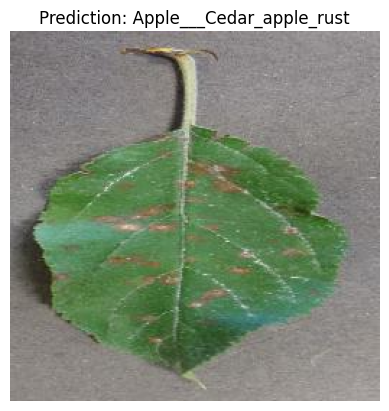

Predicted class: Apple___Cedar_apple_rust


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define paths
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust2.JPG'  # Path to the test image
model_path = '/kaggle/working/best_trained_model2.keras'  # Path to the saved model

# Load the trained model
model = load_model(model_path)

# Class labels dictionary (index to class name mapping)
class_labels = {
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___Cedar_apple_rust',
    3: 'Apple___healthy',
    4: 'Blueberry___healthy',
    5: 'Cherry_(including_sour)___Powdery_mildew',
    6: 'Cherry_(including_sour)___healthy',
    7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    8: 'Corn_(maize)___Common_rust_',
    9: 'Corn_(maize)___Northern_Leaf_Blight',
    10: 'Corn_(maize)___healthy',
    11: 'Grape___Black_rot',
    12: 'Grape___Esca_(Black_Measles)',
    13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    14: 'Grape___healthy',
    15: 'Orange___Haunglongbing_(Citrus_greening)',
    16: 'Peach___Bacterial_spot',
    17: 'Peach___healthy',
    18: 'Pepper,_bell___Bacterial_spot',
    19: 'Pepper,_bell___healthy',
    20: 'Potato___Early_blight',
    21: 'Potato___Late_blight',
    22: 'Potato___healthy',
    23: 'Raspberry___healthy',
    24: 'Soybean___healthy',
    25: 'Squash___Powdery_mildew',
    26: 'Strawberry___Leaf_scorch',
    27: 'Strawberry___healthy',
    28: 'Tomato___Bacterial_spot',
    29: 'Tomato___Early_blight',
    30: 'Tomato___Late_blight',
    31: 'Tomato___Leaf_Mold',
    32: 'Tomato___Septoria_leaf_spot',
    33: 'Tomato___Spider_mites Two-spotted_spider_mite',
    34: 'Tomato___Target_Spot',
    35: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    36: 'Tomato___Tomato_mosaic_virus',
    37: 'Tomato___healthy'
}

# Helper function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Normalize image
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the input image
image_array = preprocess_image(image_path)

# Predict class
prediction = model.predict(image_array, verbose=0)
predicted_class_index = np.argmax(prediction)  # Get index of predicted class

# Convert the predicted index to the actual class name
predicted_class_name = class_labels.get(predicted_class_index, None)

# Display the image and predicted class
img = load_img(image_path)  # Load the image for displaying
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Prediction: {predicted_class_name}")
plt.show()

# Print the predicted class
print(f"Predicted class: {predicted_class_name}")


Plotting accuracy and loss curves

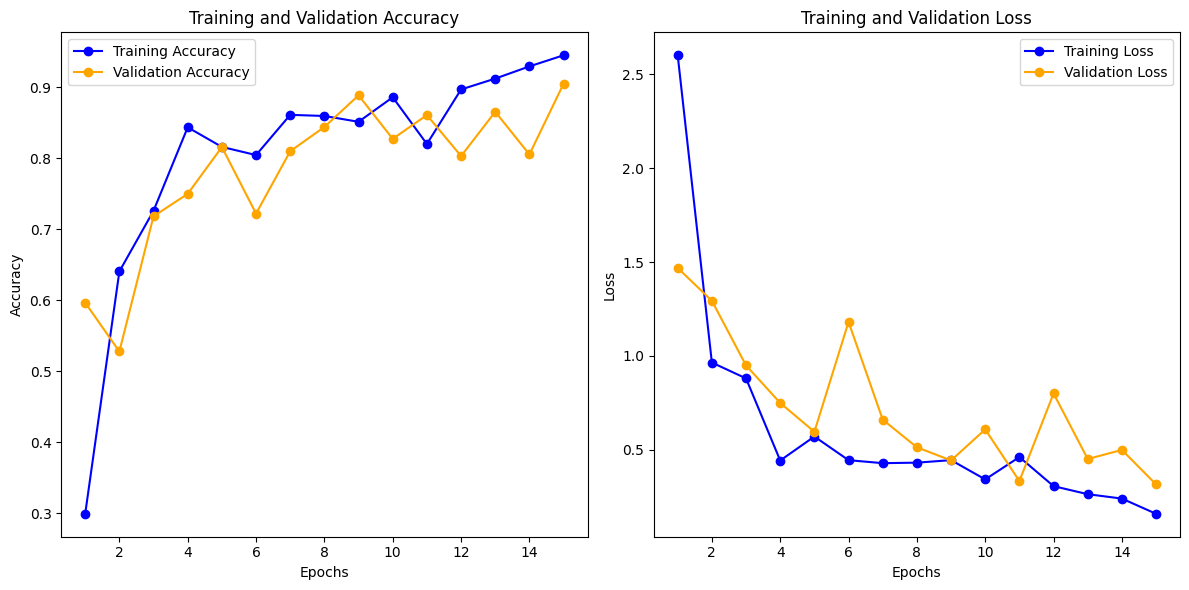

In [39]:
import matplotlib.pyplot as plt

# Data for epochs 1 to 15 (you can replace these with the actual values from your training process)
epochs = list(range(1, 16))

# Training and Validation accuracy for each epoch
train_accuracy = [0.2990, 0.6406, 0.7262, 0.8438, 0.8162, 0.8047, 0.8614, 0.8598, 0.8516, 0.8862, 0.8203, 0.8972, 0.9125, 0.9297, 0.9454]
val_accuracy = [0.5966, 0.5278, 0.7184, 0.7500, 0.8160, 0.7222, 0.8101, 0.8443, 0.8889, 0.8276, 0.8611, 0.8033, 0.8657, 0.8056, 0.9053]

# Training and Validation loss for each epoch
train_loss = [2.6015, 0.9647, 0.8802, 0.4428, 0.5706, 0.4446, 0.4287, 0.4314, 0.4448, 0.3422, 0.4612, 0.3063, 0.2634, 0.2400, 0.1590]
val_loss = [1.4687, 1.2936, 0.9494, 0.7495, 0.5957, 1.1811, 0.6605, 0.5132, 0.4432, 0.6085, 0.3334, 0.7999, 0.4508, 0.4993, 0.3154]

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
